In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score

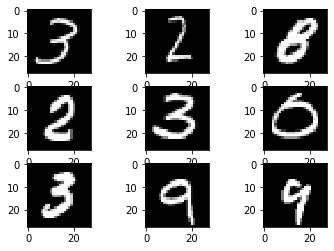

In [9]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.astype(int), test_size=0.25, random_state=42)
plt.figure()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape((28,28)),cmap='gray')
plt.show()

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
lr_l1 = LogisticRegressionCV(cv = 5, multi_class='multinomial', scoring = 'neg_log_loss', penalty='l1', solver='saga', max_iter = 1000, tol=0.01, n_jobs=-1)
lr_l1.fit(X_train, Y_train)
print('Tuned C:  %.4f' % lr_l1.C_[0])
print('Train loss with L1 penalty: %.4f' % log_loss(Y_train, lr_l1.predict_proba(X_train)))
print('Train acc with L1 penalty: %.4f' % accuracy_score(Y_train, lr_l1.predict(X_train)))
print('Test loss with L1 penalty: %.4f' % log_loss(Y_test, lr_l1.predict_proba(X_test)))
print('Test acc with L1 penalty: %.4f' % accuracy_score(Y_test, lr_l1.predict(X_test)))
print("Sparsity with L1 penalty: %.2f%%" % (np.mean(lr_l1.coef_ ==0) * 100))

Tuned C:  10000.0000
Train loss with L1 penalty: 0.3080
Train acc with L1 penalty: 0.9125
Test loss with L1 penalty: 0.3265
Test acc with L1 penalty: 0.9089
Sparsity with L1 penalty: 8.93%


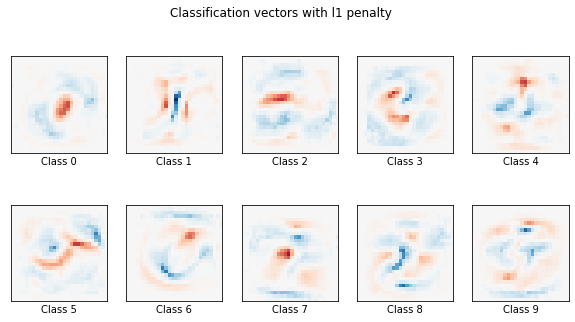

In [17]:
lr_l1_coef = lr_l1.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(lr_l1_coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(lr_l1_coef[i].reshape(28, 28), interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vectors with l1 penalty')
plt.show()

In [13]:
lr_l2 = LogisticRegressionCV(cv = 5,multi_class='multinomial', scoring = 'neg_log_loss', penalty='l2', solver='saga', max_iter = 1000, tol=0.01, n_jobs=-1)
lr_l2.fit(X_train, Y_train)
print('Tuned C:  %.4f' % lr_l2.C_[0])
print('Train loss with L2 penalty: %.4f' % log_loss(Y_train, lr_l2.predict_proba(X_train)))
print('Train acc with L2 penalty: %.4f' % accuracy_score(Y_train, lr_l2.predict(X_train)))
print('Test loss with L2 penalty: %.4f' % log_loss(Y_test, lr_l2.predict_proba(X_test)))
print('Test acc with L2 penalty: %.4f' % accuracy_score(Y_test, lr_l2.predict(X_test)))
print("Sparsity with L2 penalty: %.2f%%" % (np.mean(lr_l2.coef_ ==0) * 100))

Tuned C:  10000.0000
Train loss with L2 penalty: 0.2811
Train acc with L2 penalty: 0.9209
Test loss with L2 penalty: 0.3065
Test acc with L2 penalty: 0.9151
Sparsity with L2 penalty: 8.93%


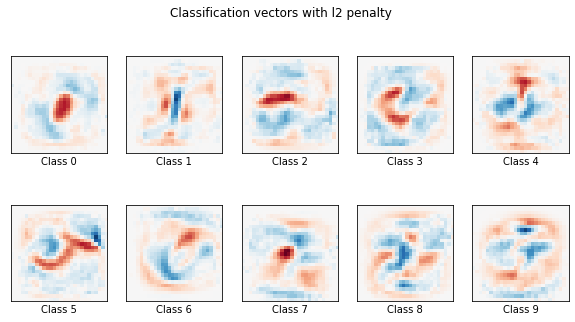

In [18]:
lr_l2_coef = lr_l2.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(lr_l2_coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(lr_l2_coef[i].reshape(28, 28), interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vectors with l2 penalty')
plt.show()

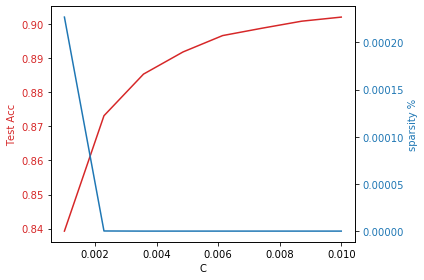

In [19]:
Cs = np.linspace(1e-3,1e-2,8)
lr_l1_cs = [LogisticRegression(C=c,multi_class='multinomial',penalty='l1',solver='saga',max_iter = 1000,tol=0.01) for c in Cs]
lr_l1_cs = [lr.fit(X_train,Y_train) for lr in lr_l1_cs]
sparsity_cs = [(np.mean(lr.coef_==0)**100) for lr in lr_l1_cs]
test_acc_cs = [accuracy_score(Y_test, lr.predict(X_test)) for lr in lr_l1_cs]
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('Test Acc', color=color)
ax1.plot(Cs, test_acc_cs, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('sparsity %', color=color)
ax2.plot(Cs, sparsity_cs, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()